In [70]:
from utility_fncs import load_dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np

In [39]:
load_dataset.credit_df.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [40]:
x = pd.get_dummies(load_dataset.credit_df.drop('Balance',axis=1),drop_first=True,dtype=float)
y = load_dataset.credit_df[['Balance']]
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [42]:
lin=LinearRegression()
lin.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
beta_values=pd.DataFrame(lin.coef_.reshape(-1,1),index=x_train.columns,columns=['beta_values'])
beta_values

,beta_values
Income,-7.554059
Limit,0.198058
Rating,0.971292
Cards,19.123826
Age,-0.603695
Education,-1.078674
Gender_Female,-12.493725
Student_Yes,418.435398
Married_Yes,-6.150365
Ethnicity_Asian,13.295548


<Axes: xlabel='beta_values', ylabel='None'>

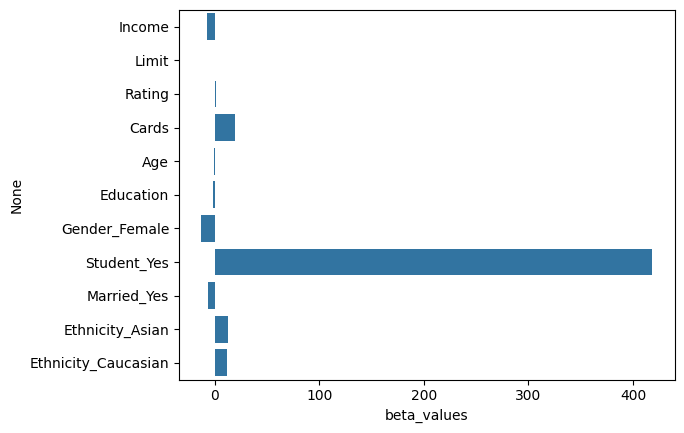

In [58]:
sns.barplot(x='beta_values', y=beta_values.index, data=beta_values, orient='h')

In [15]:
object_dummy_encodings=[]
print(load_dataset.credit_df.columns)
for col in load_dataset.credit_df.columns:
    if load_dataset.credit_df[col].dtype == 'object':
        print(col)
        object_dummy_encodings.append(pd.get_dummies(load_dataset.credit_df[col], prefix=col, drop_first=True))

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')
Gender
Student
Married
Ethnicity


In [67]:
best_cat_feature = 'Student_Yes'

# Define the model.
features = ['Income', best_cat_feature]
model3 = LinearRegression()
model3.fit(x_train[features], y_train)

# Collect betas from fitted model.
beta0 = model3.intercept_
beta1 = model3.coef_.reshape(-1,1)[features.index('Income')]
beta2 = model3.coef_.reshape(-1,1)[features.index(best_cat_feature)]

# Display betas in a DataFrame.
coefs = pd.DataFrame([beta0, beta1, beta2], index=['Intercept']+features, columns=['beta_value'])
coefs

,beta_value
Intercept,177.658909
Income,6.773090
Student_Yes,371.895694


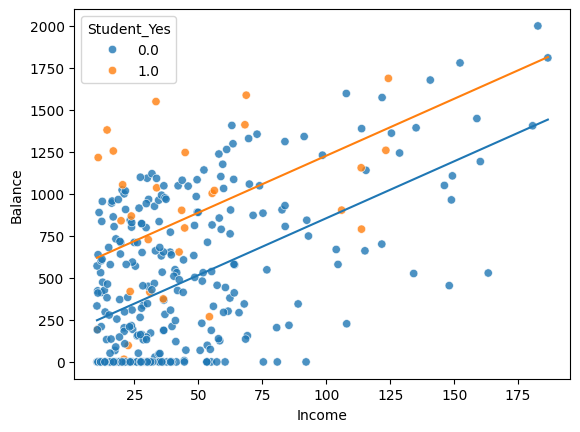

In [71]:
### edTest(test_prediction_lines) ###
# Create space of x values to predict on.
x_space = np.linspace(x['Income'].min(), x['Income'].max(), 1000)

# Generate 2 sets of predictions based on best categorical feature value.
# When categorical feature is true/present (1)
y_hat_yes = beta0 + beta1 * x_space + beta2 * 1
# When categorical feature is false/absent (0)
y_hat_no = beta0 + beta1 * x_space + beta2 * 0

# Plot the 2 prediction lines for students and non-students.
ax = sns.scatterplot(data=pd.concat([x_train, y_train], axis=1), x='Income', y='Balance', hue=best_cat_feature, alpha=0.8)
ax.plot(x_space, y_hat_no)
ax.plot(x_space, y_hat_yes);